In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm

In [226]:
# mac 폰트 추가
font_path = '/Library/Fonts/Arial Unicode.ttf'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

# font_path = 'C:/Windows/Fonts/batang.ttc'           # 한글 폰트를 적용하여 시각화
# font_prop = fm.FontProperties(fname=font_path)

In [227]:
df = pd.read_csv('./data/pokedex_data.csv')
df

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1040,896,Glastrier,Polaross,ブリザポス (Burizaposu),8,Sub Legendary,Wild Horse Pokémon,1,Ice,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,1041,897,Spectrier,Phantoross,レイスポス (Reisuposu),8,Sub Legendary,Swift Horse Pokémon,1,Ghost,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,1042,898,Calyrex,Coronospa,バドレックス (Budrex),8,Legendary,King Pokémon,2,Psychic,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,1043,898,Calyrex Ice Rider,Coronospa,バドレックス (Budrex),8,Legendary,High King Pokémon,2,Psychic,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [228]:
df.columns      # 51개 컬럼명 확인

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

In [229]:
df_dropped = df.drop(columns=['Unnamed: 0', 'german_name', 'japanese_name', 'generation', 'status', 'species', 'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2', 'ability_hidden', 'catch_rate', 'base_friendship', 'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2', 'percentage_male', 'egg_cycles'])
df_dropped.columns      # 능력치와 상성을 제외한 21개 컬럼 삭제

Index(['pokedex_number', 'name', 'type_number', 'type_1', 'type_2',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fight',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy'],
      dtype='object')

In [230]:
df_dropped

,pokedex_number,name,type_number,type_1,type_2,total_points,hp,attack,defense,sp_attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,2,Grass,Poison,318,45,49,49,65,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,2,Grass,Poison,405,60,62,63,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,2,Grass,Poison,525,80,82,83,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,2,Grass,Poison,625,80,100,123,122,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Fire,NaN,309,39,52,43,60,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,1,Ice,NaN,580,100,145,130,65,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,897,Spectrier,1,Ghost,NaN,580,100,65,60,145,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,898,Calyrex,2,Psychic,Grass,500,100,80,80,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,898,Calyrex Ice Rider,2,Psychic,Ice,680,100,165,150,85,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [231]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1045 non-null   int64  
 1   name              1045 non-null   object 
 2   type_number       1045 non-null   int64  
 3   type_1            1045 non-null   object 
 4   type_2            553 non-null    object 
 5   total_points      1045 non-null   int64  
 6   hp                1045 non-null   int64  
 7   attack            1045 non-null   int64  
 8   defense           1045 non-null   int64  
 9   sp_attack         1045 non-null   int64  
 10  sp_defense        1045 non-null   int64  
 11  speed             1045 non-null   int64  
 12  against_normal    1045 non-null   float64
 13  against_fire      1045 non-null   float64
 14  against_water     1045 non-null   float64
 15  against_electric  1045 non-null   float64
 16  against_grass     1045 non-null   float64


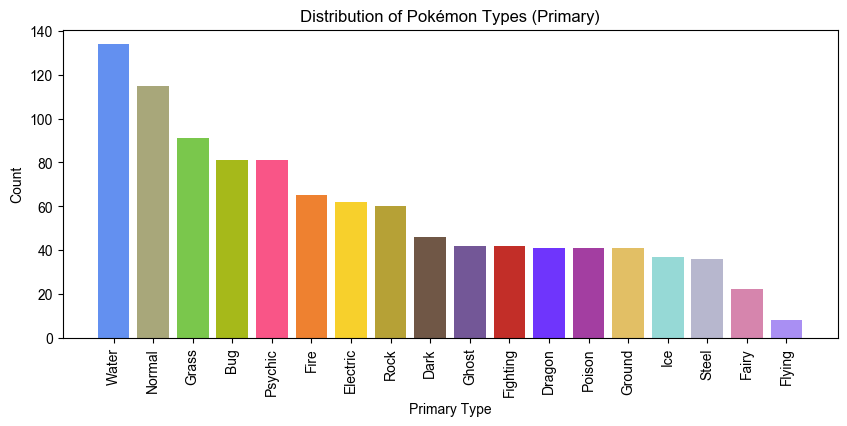

In [232]:
type_counts = df_dropped['type_1'].value_counts()

types = type_counts.index
counts = type_counts.values

type_colors = {
    'Normal': '#A8A77A',
    'Fire': '#EE8130',
    'Water': '#6390F0',
    'Electric': '#F7D02C',
    'Grass': '#7AC74C',
    'Ice': '#96D9D6',
    'Fighting': '#C22E28',
    'Poison': '#A33EA1',
    'Ground': '#E2BF65',
    'Flying': '#A98FF3',
    'Psychic': '#F95587',
    'Bug': '#A6B91A',
    'Rock': '#B6A136',
    'Ghost': '#735797',
    'Dragon': '#6F35FC',
    'Dark': '#705746',
    'Steel': '#B7B7CE',
    'Fairy': '#D685AD'
}

colors = [type_colors.get(typ, 'gray') for typ in types]

plt.figure(figsize=(10, 4))
plt.bar(types, counts, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Distribution of Pokémon Types (Primary)')

plt.show()

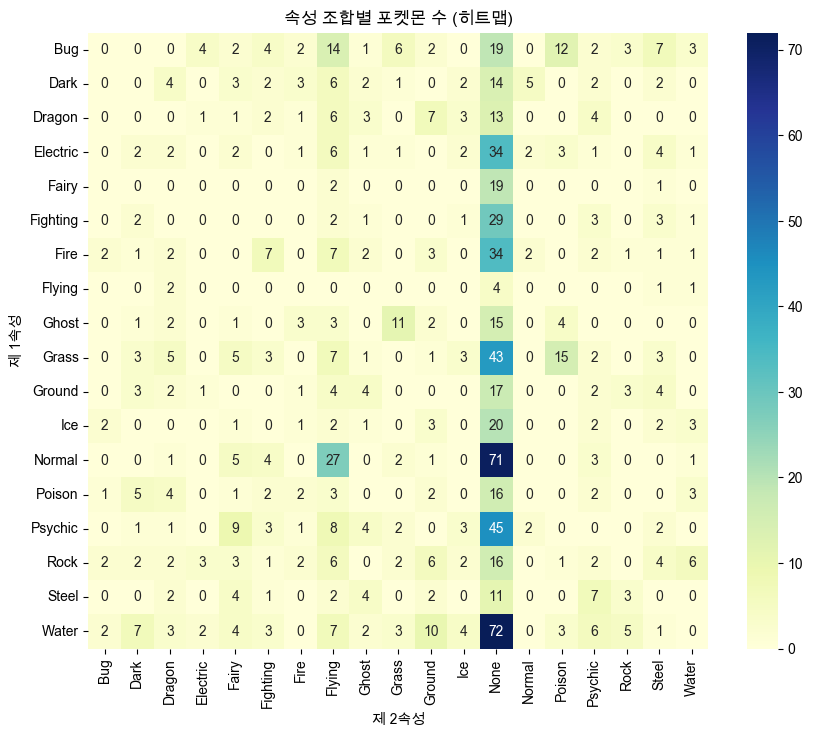

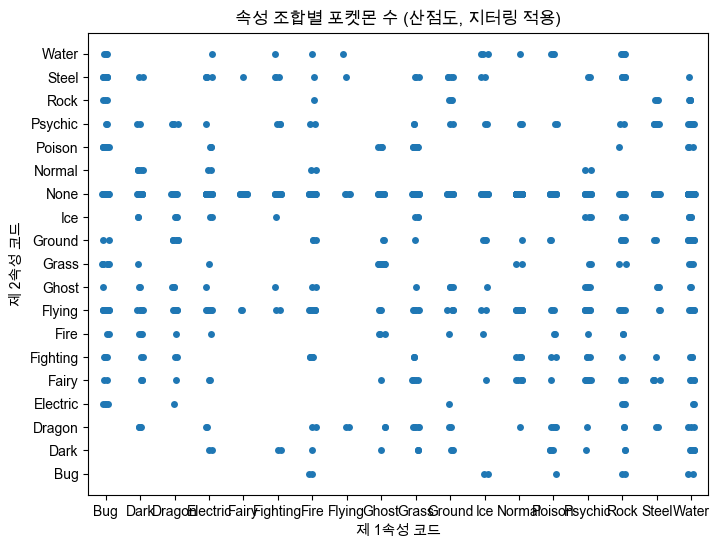

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use s

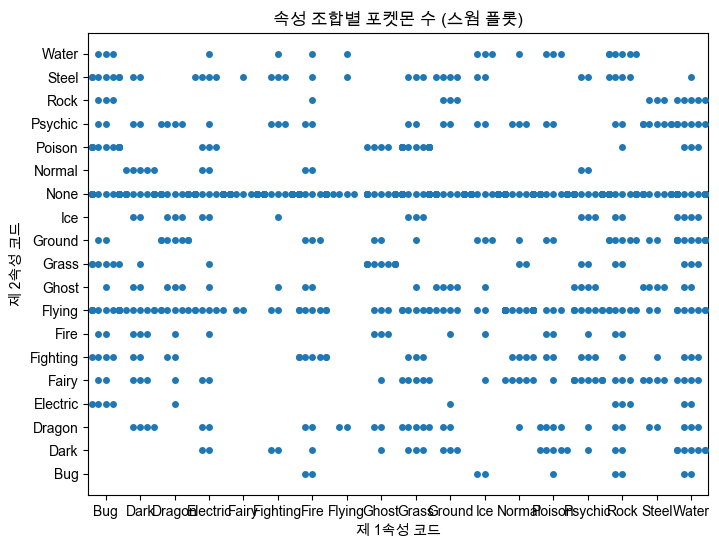

In [233]:
# type_2에 None 값이 있으므로 문자열 'None'으로 채우기
df_dropped['type_2'] = df_dropped['type_2'].fillna('None')

# 1. 히트맵 (추천하는 방법)
type_counts = df_dropped.groupby(['type_1', 'type_2']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(type_counts, annot=True, cmap='YlGnBu')
plt.title('속성 조합별 포켓몬 수 (히트맵)')
plt.xlabel('제 2속성')
plt.ylabel('제 1속성')
plt.show()

# 2. 산점도 (점 겹침 문제 발생 가능성 있음)
# type_1, type_2를 숫자로 변환 (카테고리 코드로 변환)
df_dropped['type_1_code'] = df_dropped['type_1'].astype('category').cat.codes
df_dropped['type_2_code'] = df_dropped['type_2'].astype('category').cat.codes

# 지터링을 적용한 산점도
plt.figure(figsize=(8, 6))
sns.stripplot(x='type_1_code', y='type_2_code', data=df_dropped, jitter=True)
plt.title('속성 조합별 포켓몬 수 (산점도, 지터링 적용)')
plt.xlabel('제 1속성 코드')
plt.ylabel('제 2속성 코드')

# x, y축 눈금 레이블을 원래 속성 이름으로 변경
type_1_categories = df_dropped['type_1'].astype('category').cat.categories
type_2_categories = df_dropped['type_2'].astype('category').cat.categories
plt.xticks(range(len(type_1_categories)), type_1_categories)
plt.yticks(range(len(type_2_categories)), type_2_categories)

plt.show()

# 스웜 플롯 (점 겹침을 더 효과적으로 해결)
plt.figure(figsize=(8, 6))
sns.swarmplot(x='type_1_code', y='type_2_code', data=df_dropped)
plt.title('속성 조합별 포켓몬 수 (스웜 플롯)')
plt.xlabel('제 1속성 코드')
plt.ylabel('제 2속성 코드')
plt.xticks(range(len(type_1_categories)), type_1_categories)
plt.yticks(range(len(type_2_categories)), type_2_categories)
plt.show()

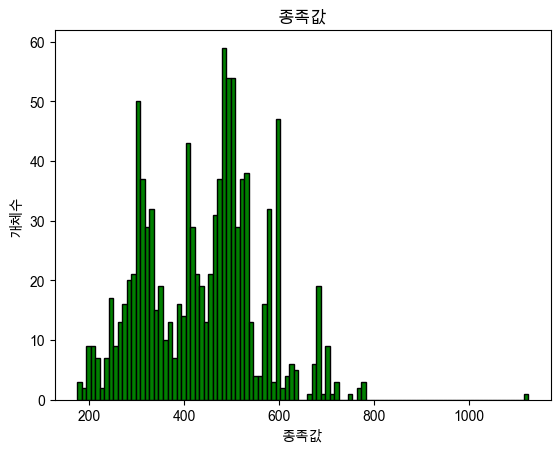

In [234]:
plt.hist(df_dropped['total_points'], bins=100, color='green', edgecolor='black')
plt.title('종족값')
plt.xlabel('종족값')
plt.ylabel('개체수')
plt.show()

In [235]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1045 non-null   int64  
 1   name              1045 non-null   object 
 2   type_number       1045 non-null   int64  
 3   type_1            1045 non-null   object 
 4   type_2            1045 non-null   object 
 5   total_points      1045 non-null   int64  
 6   hp                1045 non-null   int64  
 7   attack            1045 non-null   int64  
 8   defense           1045 non-null   int64  
 9   sp_attack         1045 non-null   int64  
 10  sp_defense        1045 non-null   int64  
 11  speed             1045 non-null   int64  
 12  against_normal    1045 non-null   float64
 13  against_fire      1045 non-null   float64
 14  against_water     1045 non-null   float64
 15  against_electric  1045 non-null   float64
 16  against_grass     1045 non-null   float64


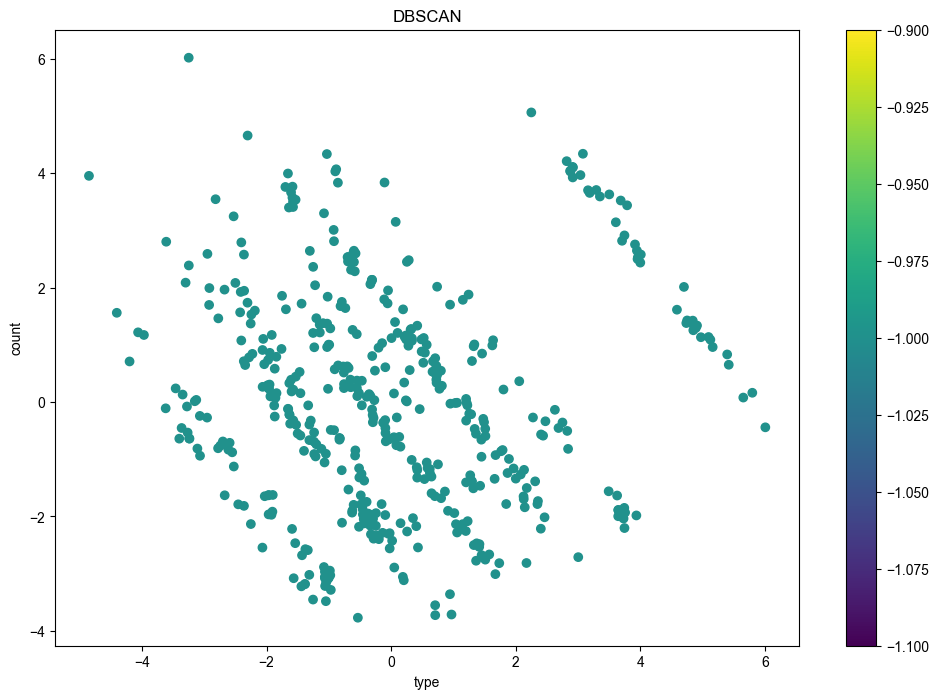

In [244]:
# DBSCAN 군집화

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_dropped_single = df_dropped[df_dropped['type_2'] == 'None']

numeric_columns = df_dropped_single.select_dtypes(include=['int64', 'float64']).columns
X = df_dropped_single[numeric_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
labels = dbscan.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN')
plt.xlabel('type')
plt.ylabel('count')
plt.colorbar(scatter)
plt.show()

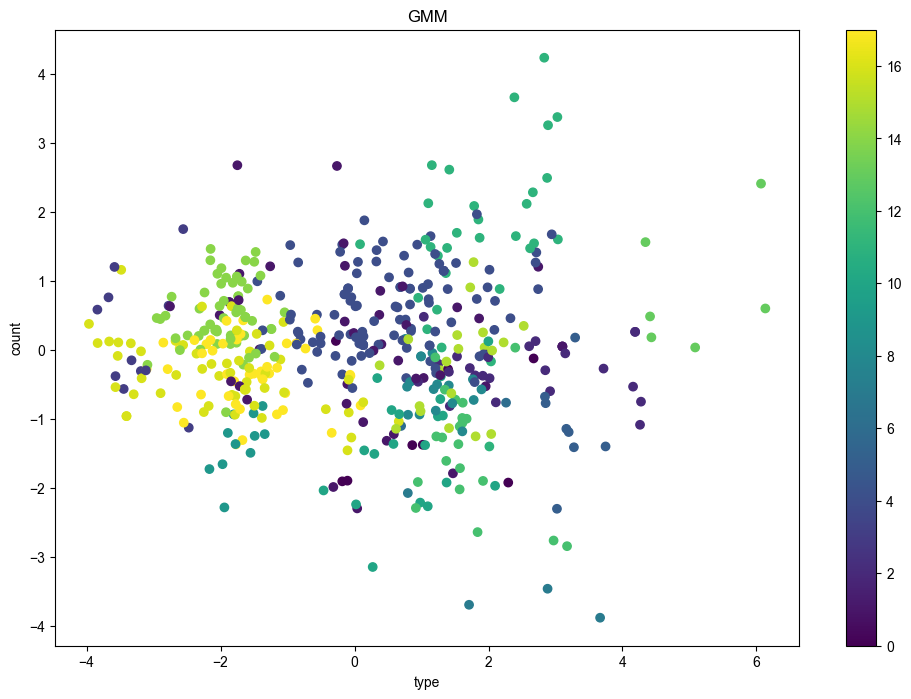

In [237]:
# GMM 군집화

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# numeric_columns = df_dropped_single.select_dtypes(include=['int64', 'float64']).columns
X = df_dropped_single[['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gm = GaussianMixture(n_components=18, random_state=42)
gm.fit(X_scaled)
labels = gm.predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('GMM')
plt.xlabel('type')
plt.ylabel('count')
plt.colorbar(scatter)
plt.show()

In [238]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1045 non-null   int64  
 1   name              1045 non-null   object 
 2   type_number       1045 non-null   int64  
 3   type_1            1045 non-null   object 
 4   type_2            1045 non-null   object 
 5   total_points      1045 non-null   int64  
 6   hp                1045 non-null   int64  
 7   attack            1045 non-null   int64  
 8   defense           1045 non-null   int64  
 9   sp_attack         1045 non-null   int64  
 10  sp_defense        1045 non-null   int64  
 11  speed             1045 non-null   int64  
 12  against_normal    1045 non-null   float64
 13  against_fire      1045 non-null   float64
 14  against_water     1045 non-null   float64
 15  against_electric  1045 non-null   float64
 16  against_grass     1045 non-null   float64


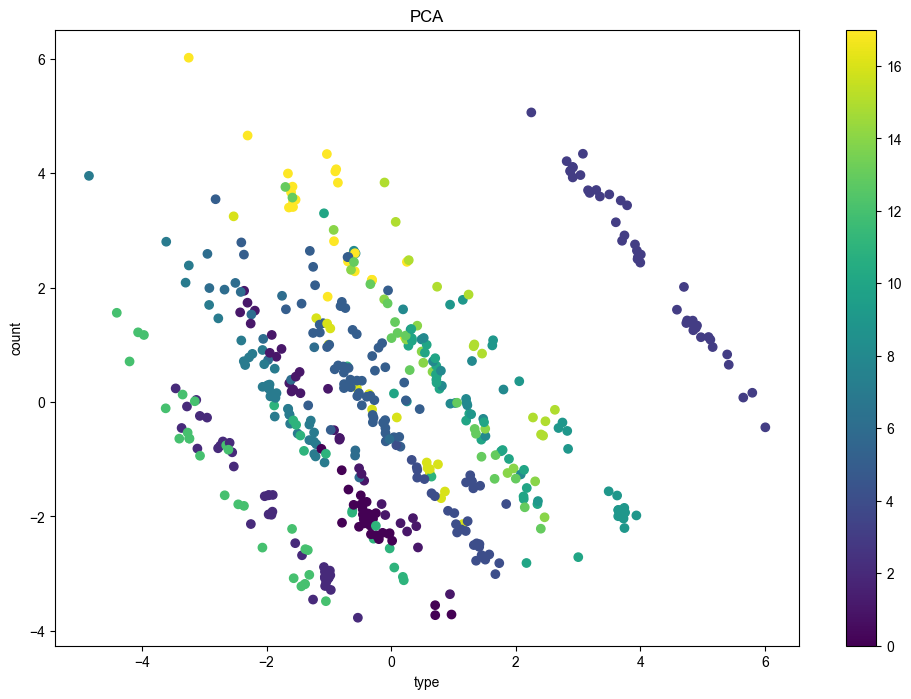

In [ ]:
# KMeans 군집화

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_dropped_single[df_dropped_single.select_dtypes(include=['int64', 'float64']).columns]
y = df_dropped_single['type_1']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(
    n_clusters=18,
    init='k-means++',
    max_iter=10000,
    
    random_state=42
)
kmeans.fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('PCA')
plt.xlabel('type')
plt.ylabel('count')
plt.colorbar(scatter)
plt.show()


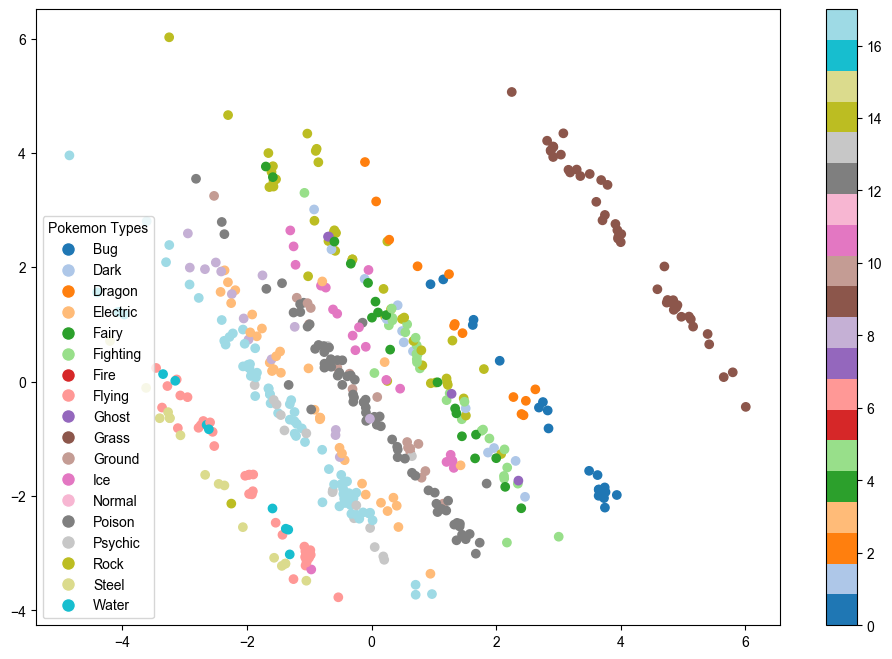

In [223]:
# LabelEncoder 군집화

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_dropped_single = df_dropped[df_dropped['type_2'] == 'None']

numeric_columns = df_dropped_single.select_dtypes(include=['int64', 'float64']).columns
# X = df_dropped_single[['against_normal', 'against_fire', 'against_water', 'against_electric', 
                #   'against_grass', 'against_ice', 'against_poison', 'against_ground', 'against_flying',
                #   'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
                #   'against_dark', 'against_steel', 'against_fairy']]
X = df_dropped_single[numeric_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

le = LabelEncoder()
type_labels = le.fit_transform(df_dropped_single['type_1'])

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=type_labels, cmap='tab20')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=plt.cm.tab20(i/18), 
                            label=type_name, markersize=10)
                  for i, type_name in enumerate(le.classes_)]
plt.legend(handles=legend_elements, title='Pokemon Types')
plt.colorbar(scatter)
plt.show()

In [201]:
from sklearn.cluster import KMeans
df_dropped_single = df_dropped[df_dropped['type_2'] == 'None']

X = df_dropped_single['pokedex_number', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
y = df_dropped_single['type_1']

kmeans = KMeans(
    n_clusters=18,
    init='k-means++',
    max_iter=300,
    random_state=42
)

kmeans.fit(X)
distances = kmeans.transform(X)
distances

KeyError: ('pokedex_number', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed')

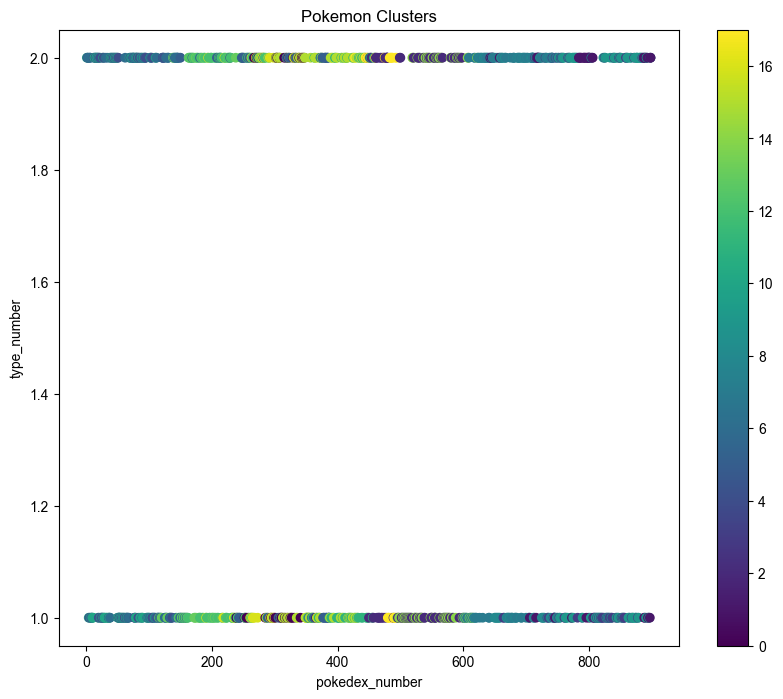

In [155]:
import matplotlib.pyplot as plt

# 2D로 시각화하기 위해 주요 특성 2개 선택
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel(numeric_columns[0])
plt.ylabel(numeric_columns[1])
plt.title('Pokemon Clusters')
plt.colorbar()
plt.show()